# Mnist American Sign Language Understanding

The datasets used in this notebook came from <a href="https://www.kaggle.com/datamunge/sign-language-mnist/">this kaggle page</a>. <br>

## 1. Objectives

<p align="center">
    <img src="images/american_sign_language.png?raw=1" alt="Amercian sign language signs" width="350"/>
</p>

The main goal with this notebook is to build a **Convulational Neural Network (CNN)** and use it to detect the letters present in images belonging to American sign language.

### 2. Imports...

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelBinarizer

### 3. Training and testing datasets 

There are two datasets: **sign_mnist_train.csv** and **sign_mnist_test.csv** <br>
The training examples are present in the training dataset and the examples to test the CNN are in the test dataset <br>

In [2]:
train_df = pd.read_csv("datasets/sign_mnist_train.csv")
test_df = pd.read_csv("datasets/sign_mnist_test.csv")

In [3]:
train_df

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27450,13,189,189,190,190,192,193,193,193,193,...,132,165,99,77,52,200,234,200,222,225
27451,23,151,154,157,158,160,161,163,164,166,...,198,198,198,198,198,196,195,195,195,194
27452,18,174,174,174,174,174,175,175,174,173,...,121,196,209,208,206,204,203,202,200,200
27453,17,177,181,184,185,187,189,190,191,191,...,119,56,27,58,102,79,47,64,87,93


In [4]:
test_df

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7167,1,135,119,108,102,105,99,61,103,121,...,108,112,116,114,118,180,184,176,167,163
7168,12,157,159,161,164,166,166,171,174,175,...,213,213,213,214,213,211,210,210,209,208
7169,2,190,191,190,191,190,190,192,192,191,...,216,215,213,214,214,213,210,211,209,208
7170,4,201,205,208,209,214,216,218,223,226,...,112,169,255,255,237,113,91,67,70,63


In [5]:
train_df.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,...,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000
mean,12.318813,145.419377,148.500273,151.247714,153.546531,156.210891,158.411255,160.472154,162.339683,163.954799,...,141.104863,147.495611,153.325806,159.125332,161.969259,162.736696,162.906137,161.966454,161.137898,159.824731
std,7.287552,41.358555,39.942152,39.056286,38.595247,37.111165,36.125579,35.016392,33.661998,32.651607,...,63.751194,65.512894,64.427412,63.708507,63.738316,63.444008,63.509210,63.298721,63.610415,64.396846
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,121.000000,126.000000,130.000000,133.000000,137.000000,140.000000,142.000000,144.000000,146.000000,...,92.000000,96.000000,103.000000,112.000000,120.000000,125.000000,128.000000,128.000000,128.000000,125.500000
50%,13.000000,150.000000,153.000000,156.000000,158.000000,160.000000,162.000000,164.000000,165.000000,166.000000,...,144.000000,162.000000,172.000000,180.000000,183.000000,184.000000,184.000000,182.000000,182.000000,182.000000
75%,19.000000,174.000000,176.000000,178.000000,179.000000,181.000000,182.000000,183.000000,184.000000,185.000000,...,196.000000,202.000000,205.000000,207.000000,208.000000,207.000000,207.000000,206.000000,204.000000,204.000000
max,24.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000


In [6]:
test_df.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,...,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000
mean,11.247351,147.532627,150.445761,153.324317,155.663413,158.169688,160.790853,162.282766,163.649191,165.589515,...,138.546570,145.539598,150.744980,155.638873,158.893196,159.648494,158.162019,157.672755,156.664250,154.776771
std,7.446712,43.593144,41.867838,40.442728,39.354776,37.749637,36.090916,36.212636,35.885378,33.721876,...,64.501665,65.132370,65.760539,65.565147,65.200300,65.499368,66.493576,66.009690,67.202939,68.285148
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,122.000000,126.000000,130.000000,134.000000,137.000000,141.000000,144.000000,145.000000,147.000000,...,90.000000,95.000000,99.000000,105.000000,113.000000,113.750000,113.000000,115.000000,111.000000,106.750000
50%,11.000000,154.000000,157.000000,159.000000,161.000000,163.000000,165.000000,166.000000,168.000000,169.000000,...,137.000000,155.000000,168.000000,177.000000,181.000000,182.000000,181.000000,180.000000,180.000000,179.000000
75%,18.000000,178.000000,179.000000,181.000000,182.000000,184.000000,185.000000,186.000000,187.000000,187.000000,...,195.000000,200.000000,204.250000,207.000000,207.000000,208.000000,207.000000,205.000000,206.000000,204.000000
max,24.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000


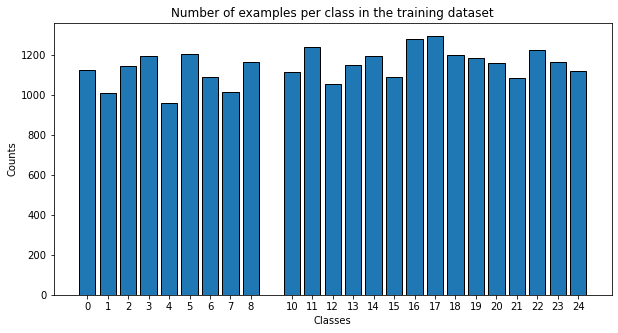

In [7]:
n_labels_examples = train_df.groupby("label").label.count()
unique_labels = sorted(train_df["label"].unique()) 
plt.figure(figsize = (10, 5))
plt.bar(x = unique_labels, height = n_labels_examples, ec="black")
plt.xticks(unique_labels)
plt.xlabel("Classes")
plt.ylabel("Counts")
plt.title("Number of examples per class in the training dataset")
plt.show()

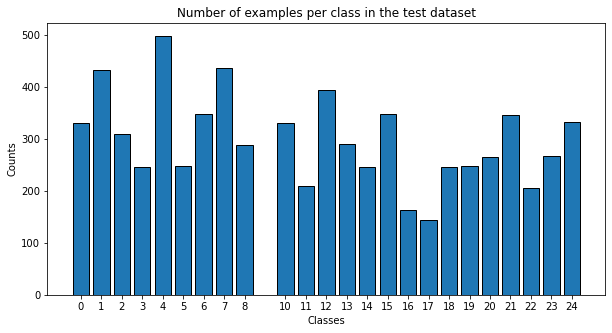

In [8]:
n_labels_examples = test_df.groupby("label").label.count()
unique_labels = sorted(test_df["label"].unique()) 
plt.figure(figsize = (10, 5))
plt.bar(x = unique_labels, height = n_labels_examples, ec="black")
plt.xticks(unique_labels)
plt.xlabel("Classes")
plt.ylabel("Counts")
plt.title("Number of examples per class in the test dataset")
plt.show()

- The training and testing datasets have 27455 and 7172 examples, respectively. <br>
- The images have 784 pixels (number of column of each dataset excluding the label column), wich means that they can be resize to 28 by 28 pixel images. <br>
- From the describe method we can see that the highest intensity value is 255 and the lowest is 0 for both datasets. <br> 
- The label column has values ranging from 0 to 24 expect for the class 9. This means the problem has 24 classes. 

### 4. Preparing the data

Because there is no class 9, from class 10 to 24 we are going to subtract 1 so the classes are in order

In [9]:
class_labels = np.arange(10, 25)
for i, example in enumerate(train_df["label"]):
    if example in class_labels:
        train_df.at[i, "label"] -= 1

for i, example in enumerate(test_df["label"]):
    if example in class_labels:
        test_df.at[i, "label"] -= 1 

In [10]:
train_labels = train_df["label"]
test_labels = test_df["label"]
train_df.drop(columns="label", inplace=True)
test_df.drop(columns="label", inplace=True)
X_train = train_df.values
X_test = test_df.values

In [11]:
train_df.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,107,118,127,134,139,143,146,150,153,156,...,207,207,207,207,206,206,206,204,203,202
1,155,157,156,156,156,157,156,158,158,157,...,69,149,128,87,94,163,175,103,135,149
2,187,188,188,187,187,186,187,188,187,186,...,202,201,200,199,198,199,198,195,194,195
3,211,211,212,212,211,210,211,210,210,211,...,235,234,233,231,230,226,225,222,229,163
4,164,167,170,172,176,179,180,184,185,186,...,92,105,105,108,133,163,157,163,164,179


In [12]:
test_df.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,149,149,150,150,150,151,151,150,151,152,...,138,148,127,89,82,96,106,112,120,107
1,126,128,131,132,133,134,135,135,136,138,...,47,104,194,183,186,184,184,184,182,180
2,85,88,92,96,105,123,135,143,147,152,...,68,166,242,227,230,227,226,225,224,222
3,203,205,207,206,207,209,210,209,210,209,...,154,248,247,248,253,236,230,240,253,255
4,188,191,193,195,199,201,202,203,203,203,...,26,40,64,48,29,46,49,46,46,53


In [13]:
X_train = X_train / 255 

In [14]:
X_test = X_test / 255 

It is prefered that the labels are one hot encoding. This means that the integer labels will be converted to binary. <br>
For this effect we are going to use LabelBinarizer from sklearn

In [15]:
lb = LabelBinarizer()
y_train = lb.fit_transform(train_labels)
y_test = lb.fit_transform(test_labels)

For example the array below is asigned to the label 3

In [16]:
y_train[0]

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

### 5. Visualizing the images

To visualize the images we need to reshape them to be 28 by 28

In [17]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

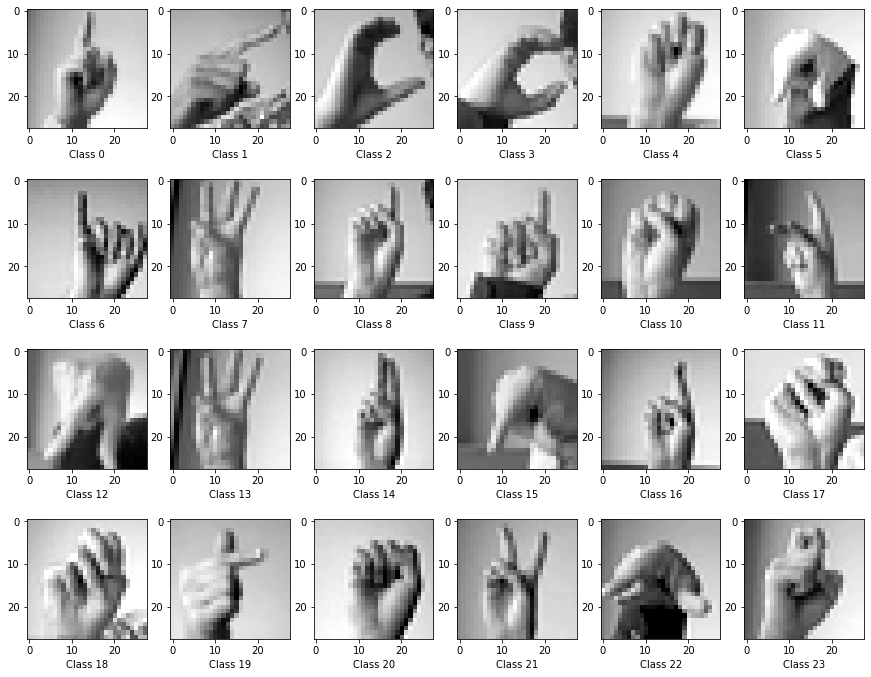

In [18]:
plt.figure(figsize=(15, 12))
for n, label in enumerate(sorted(train_labels.unique())):
   i = np.where(train_labels == label)[0][0]
   plt.subplot(4, 6, n + 1)
   plt.imshow(X_train[n], cmap="gray")
   plt.xlabel(f"Class {label}")
plt.show()

### 6. Building the Model

In [19]:
def get_model(img_size, n_labels):
    inputs = keras.layers.Input(shape = img_size)

    l = keras.layers.Conv2D(32, (3, 3), padding = "same", activation = "relu")(inputs)
    l = keras.layers.MaxPool2D((2, 2))(l)
    l = keras.layers.BatchNormalization()(l)

    l = keras.layers.Conv2D(64, (3, 3), padding = "same", activation = "relu")(l)
    l = keras.layers.MaxPool2D((2, 2))(l)
    l = keras.layers.BatchNormalization()(l)

    l = keras.layers.Conv2D(128, (3, 3), padding = "same", activation = "relu")(l)
    l = keras.layers.MaxPool2D((2, 2))(l)
    l = keras.layers.BatchNormalization()(l)

    l = keras.layers.Flatten()(l)

    l = keras.layers.Dense(512, activation = "relu")(l)

    outputs = keras.layers.Dense(n_labels, activation = "softmax")(l)

    model = keras.models.Model(inputs = inputs, outputs = outputs)
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001), loss="categorical_crossentropy", metrics=['accuracy'])
    return model

In [20]:
cnn_model = get_model((28, 28, 1), len(train_labels.unique()))
cnn_model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 14, 14, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 7, 7, 64)         

The callbacks:
- ModelCheckpoint
- EarlyStopping

In [22]:
mCheckPoint = keras.callbacks.ModelCheckpoint("best_weights.h5", monitor = "val_accuracy", save_best_only = True, mode = "max", verbose = 1)
earlyStop = keras.callbacks.EarlyStopping(monitor = "val_accuracy", mode = "max", patience = 5, min_delta = 0.001)

In [23]:
history = cnn_model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 50, batch_size = 64, callbacks=[mCheckPoint, earlyStop])

Epoch 1/50
429/429 [==============================] - 17s 41ms/step - loss: 0.5711 - accuracy: 0.8724 - val_loss: 2.1031 - val_accuracy: 0.3126
Epoch 2/50
429/429 [==============================] - 17s 40ms/step - loss: 0.0239 - accuracy: 1.0000 - val_loss: 0.2033 - val_accuracy: 0.9484
Epoch 3/50
429/429 [==============================] - 17s 39ms/step - loss: 0.0078 - accuracy: 1.0000 - val_loss: 0.1777 - val_accuracy: 0.9494
Epoch 4/50
429/429 [==============================] - 18s 42ms/step - loss: 0.0038 - accuracy: 1.0000 - val_loss: 0.1624 - val_accuracy: 0.9533
Epoch 5/50
429/429 [==============================] - 17s 41ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.1517 - val_accuracy: 0.9555
Epoch 6/50
429/429 [==============================] - 17s 39ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.1448 - val_accuracy: 0.9564
Epoch 7/50
429/429 [==============================] - 17s 41ms/step - loss: 9.7475e-04 - accuracy: 1.0000 - val_loss: 0.1452 - val_accur

If validation loss >> training loss you can call it overfitting. <br>
If validation loss  > training loss you can call it some overfitting. <br>
If validation loss  < training loss you can call it some underfitting. <br>
If validation loss << training loss you can call it underfitting. <br>

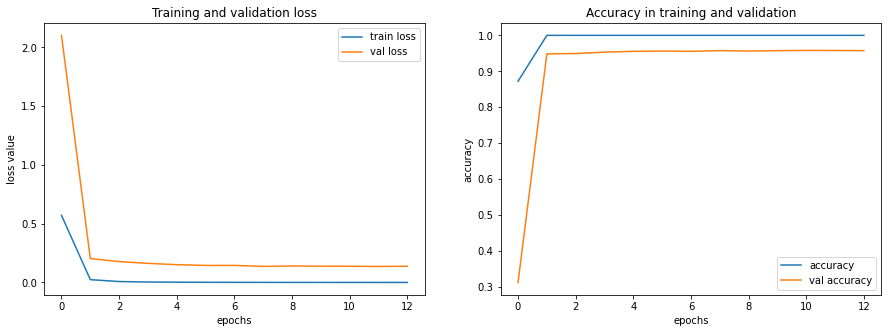

In [24]:
history_df = pd.DataFrame(history.history)
plt.figure(0, figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(history_df.loss, label="train loss")
plt.plot(history_df.val_loss, label="val loss")
plt.title("Training and validation loss")
plt.xlabel("epochs")
plt.ylabel("loss value")
plt.legend(loc="best")
plt.subplot(1, 2, 2)
plt.plot(history_df.accuracy, label="accuracy")
plt.plot(history_df.val_accuracy, label="val accuracy")
plt.title("Accuracy in training and validation")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend(loc="best")
plt.show()

### 7. Model Evaluation

Classes predicted:

In [25]:
y_pred = cnn_model.predict(X_test)
y_pred = np.argmax(y_pred, axis = 1)
y_pred

array([6, 5, 9, ..., 2, 4, 2], dtype=int64)

Classes of the test dataset

In [26]:
y_t = np.argmax(y_test, axis = 1)
y_t

array([6, 5, 9, ..., 2, 4, 2], dtype=int64)

Classification report

In [27]:
report = classification_report(y_t, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()
df_report

,precision,recall,f1-score,support
0,0.937677,1.000000,0.967836,331.000000
1,1.000000,0.983796,0.991832,432.000000
2,1.000000,1.000000,1.000000,310.000000
3,0.938462,0.995918,0.966337,245.000000
4,1.000000,0.995984,0.997988,498.000000
5,1.000000,1.000000,1.000000,247.000000
6,0.967262,0.933908,0.950292,348.000000
7,0.992991,0.974771,0.983796,436.000000
8,0.941176,1.000000,0.969697,288.000000
9,0.935976,0.927492,0.931715,331.000000


Image classification

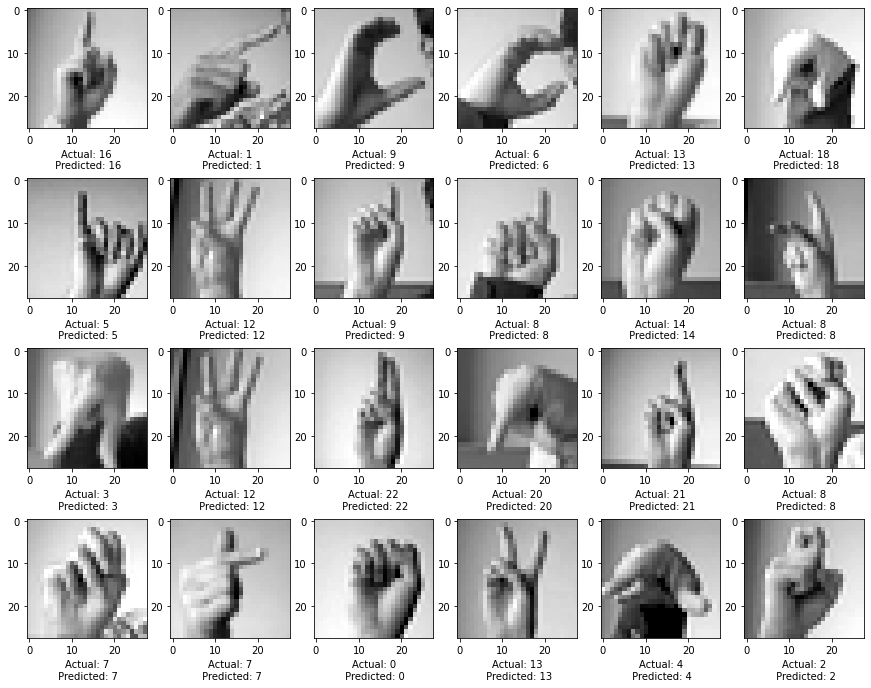

In [28]:
plt.figure(figsize=(15, 12))
for n, label in enumerate(sorted(train_labels.unique())):
   i = np.where(train_labels == label)[0][0]
   plt.subplot(4, 6, n + 1)
   plt.imshow(X_train[n], cmap="gray")
   plt.xlabel(f"Actual: {y_t[i]}\n Predicted: {y_pred[i]}")
plt.show()

Final accuracy

In [29]:
print(f"Model accuracy: {round(accuracy_score(y_t, y_pred) * 100, 1)}%")

Model accuracy: 95.7%
